# PROJECT : CASESTUDY  OF STARTUP FUNDING DATASET

## PROBLEM 1:

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

CITY   Number Of Fundings
Bangalore   413
Mumbai   303
New Delhi   215
Gurgaon   166
Noida   46


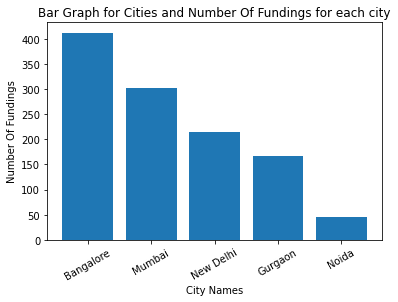

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import csv
df=pd.read_csv("Datasets/startup_funding.csv")

#Data Cleaning

df.dropna(subset=["CityLocation","AmountInUSD"],inplace=True) #Dropping all NaN values from the "CityLocation" and "AmountInUSD" Columns
df.CityLocation.replace("bangalore","Bangalore",inplace=True) #Checking CASE-SENSTIVITY and correcting, to have Unique values in the data set.
df.CityLocation.replace("Delhi","New Delhi",inplace=True) #Checking CASE-SENSTIVITY and correcting, to have Unique values in the data set.


city_name=[] #An Empty LIST to append the required CITIES
df=df.CityLocation
for names in df.values:
    split_names=names.split("/") #splitting the cities which have more than one.For Example:Mumbai / Global.Which will converted to list[Mumbai , Global]
    for name in split_names:
        stripped_name=name.strip() # To remove the LEADING SPACES and TRAILING SPACES from the List 
        if ((stripped_name=="New Delhi") | (stripped_name=="Bangalore") | (stripped_name=="Mumbai") | (stripped_name=="Gurgaon") | (stripped_name=="Noida")):
            city_name.append(stripped_name) #Append the required CITIES into the city_name list

            
dic={} #Dictionary to count the Number of fundings for the CITIES
for ele in city_name:
    dic[ele] = dic.get(ele,0) + 1
    

bar_city=[] #Empty list to append the CITIES
bar_city_values=[]#Empty list to append the NUMBER OF FUNDINGS
ord_dic=sorted(dic,key=dic.get,reverse=True) #Sorting the dictionary with respect to the Values in descending order
print("CITY  ","Number Of Fundings")
for i in range(len(ord_dic)):
    print(ord_dic[i]," ",dic[ord_dic[i]]) #Printing the Cities corresponding to their values
    bar_city.append(ord_dic[i]) # Appending the CITIES
    bar_city_values.append(dic[ord_dic[i]]) # Appending the values of NUMBER OF FUNDINGS
    
plt.bar(bar_city,bar_city_values) #plotting the BAR GRAPH with respect to the "bar_city,bar_city_values".
plt.xlabel("City Names")
plt.ylabel("Number Of Fundings")
plt.title("Bar Graph for Cities and Number Of Fundings for each city")
plt.xticks(rotation=30)
plt.show()

## PROBLEM 2:

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


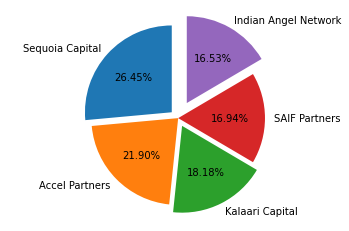

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import csv

df=pd.read_csv("Datasets/startup_funding.csv")
df.dropna(subset=["InvestorsName"],inplace=True)
investor_names=[]
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df.InvestorsName


for names in df.values:
    split_names=names.split(",")
    for each_name in split_names:
        if each_name!="":
            stripped_names=each_name.strip()
            investor_names.append(stripped_names)
investor_names
dic={}
for ele in investor_names:
    dic[ele]=dic.get(ele,0)+1
ord_dic=sorted(dic,key=dic.get,reverse=True)
investor_name=[]
investor_count=[]
for i in range(0,5):
    print(ord_dic[i],dic[ord_dic[i]])
    investor_name.append(ord_dic[i])
    investor_count.append(dic[ord_dic[i]])
explode=[0.1,0,0.1,0,0.2]

plt.pie(investor_count,labels=investor_name,autopct="%.2f%%",startangle=90,explode=explode)
plt.axis("equal")
plt.show()

## PROBLEM 3 :

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


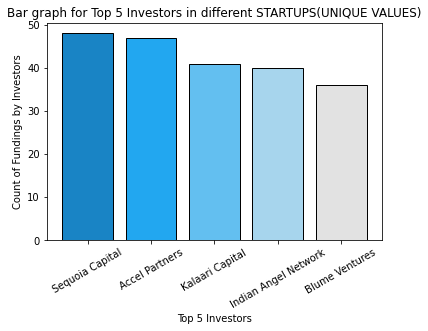

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import csv

df=pd.read_csv("Datasets/startup_funding.csv")
df.dropna(subset=["StartupName","InvestorsName"],inplace=True)
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("Filpkart.com","Flipkart",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)
df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="undisclosed investor"]

startup_name=[]
investor_name=[]

for index,row in df.iterrows():
    s_name=row["StartupName"]
    i_name=row["InvestorsName"]
    i_name=i_name.split(",")
    for names in i_name:
        if names!="":
            investor_name.append(names.strip())
            startup_name.append(s_name)
df=pd.DataFrame({"StartupName":startup_name,"InvestorsName":investor_name})
df=df.groupby("InvestorsName")["StartupName"].nunique()
df=df.sort_values(ascending=False)[0:5]
# df.InvestorsName.value_counts()
investor=[]
investor_count=[]
for i in range(0,5):
    print(df.index[i],df.values[i])
    investor.append(df.index[i])
    investor_count.append(df.values[i])
plt.title("Bar graph for Top Investors")
plt.xlabel("")
plt.xticks(rotation=30)
plt.bar(investor,investor_count,color=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2"],edgecolor='black')
plt.title("Bar graph for Top 5 Investors in different STARTUPS(UNIQUE VALUES)")
plt.xlabel("Top 5 Investors")
plt.ylabel("Count of Fundings by Investors")
plt.xticks(rotation=30)
plt.show()



## PROBLEM 4: 

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


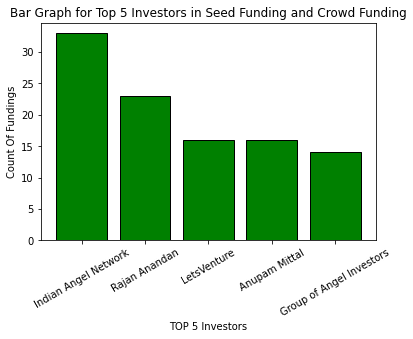

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import csv

df=pd.read_csv("Datasets/startup_funding.csv")
df.dropna(subset=["StartupName","InvestorsName"],inplace=True)
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("Filpkart.com","Flipkart",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)
df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True)
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)

df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="undisclosed investor"]
df=df[(df.InvestmentType=="Seed Funding") | (df.InvestmentType=="Crowd Funding")]
# df.InvestmentType.value_counts()
startup_name=[]
investor_name=[]
for index,row in df.iterrows():
    s_name=row["StartupName"]
    i_name=row["InvestorsName"]

    i_name=i_name.split(",")
    for names in i_name:
        if names!="":
            investor_name.append(names.strip())
            startup_name.append(s_name)
df=pd.DataFrame({"StartupName":startup_name,"InvestorsName":investor_name})
df=df.groupby("InvestorsName")["StartupName"].nunique()
df=df.sort_values(ascending=False)[0:5]
df

investor=[]
investor_count=[]
for i in range(0,5):
    print(df.index[i],df.values[i])
    investor.append(df.index[i])
    investor_count.append(df.values[i])
labels=investor
plt.bar(investor,investor_count,color="green",edgecolor='black')
plt.xticks(rotation=30)
plt.title("Bar Graph for Top 5 Investors in Seed Funding and Crowd Funding")
plt.xlabel("TOP 5 Investors")
plt.ylabel("Count Of Fundings")
plt.show()

## PROBLEM 5:

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


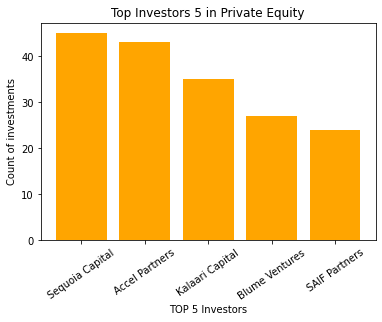

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import csv

df=pd.read_csv("Datasets/startup_funding.csv")
df.dropna(subset=["StartupName","InvestorsName"],inplace=True)
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("Filpkart.com","Flipkart",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)
df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True)
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)

df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="undisclosed investor"]
df=df[(df.InvestmentType=="Private Equity")]
# df.InvestmentType.value_counts()
startup_name=[]
investor_name=[]
for index,row in df.iterrows():
    s_name=row["StartupName"]
    i_name=row["InvestorsName"]
    t_name=row["InvestmentType"]
    i_name=i_name.split(",")
    for names in i_name:
        if names!="":
            investor_name.append(names.strip())
            startup_name.append(s_name)
df=pd.DataFrame({"StartupName":startup_name,"InvestorsName":investor_name})
df=df.groupby("InvestorsName")["StartupName"].nunique()
df=df.sort_values(ascending=False)[0:5]
df

investor=[]
investor_count=[]
for i in range(0,5):
    print(df.index[i],df.values[i])
    investor.append(df.index[i])
    investor_count.append(df.values[i])
plt.bar(investor,investor_count,color="orange")
plt.xticks(rotation=35)
plt.title("Top Investors 5 in Private Equity")
plt.xlabel("TOP 5 Investors")
plt.ylabel("Count of investments")
plt.show()